## KNN regression

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and preliminary plots

In [218]:
df = pd.read_csv('02_dataset/merged_df.csv')

In [219]:
df.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'country', 'yearly_avg_rainfall',
       'rainfall_var_t', 'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t',
       'temp_var_t_1', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [220]:
df.head(5)

,Unnamed: 0,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
0,0,AFG,1960,Afghanistan,318.565807,-0.075064,-0.075064,116.206019,0.036755,0.036755,...,NaN,1454.1108,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,1961,Afghanistan,294.653108,-0.075064,-0.075064,120.477183,0.036755,0.036755,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
2,2,AFG,1962,Afghanistan,243.503638,-0.173592,-0.075064,117.250992,-0.026778,0.036755,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
3,3,AFG,1963,Afghanistan,307.702050,0.263645,-0.173592,126.046296,0.075013,-0.026778,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
4,4,AFG,1964,Afghanistan,300.362434,-0.023853,0.263645,110.172619,-0.125935,0.075013,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN


In [221]:
# drop rows with NaNs
df = df.dropna()

In [222]:
df.sort_values(by=['Year'])
df.head(5)

,Unnamed: 0,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
94,94,ALB,1990,Albania,722.833333,0.066575,-0.123247,111.416667,0.049451,-0.018814,...,-9.575638,5407.3247,47.849697,10.304,0.000000,0.310099,0.0,3286542.0,31250.0,0.009508
95,95,ALB,1991,Albania,827.910714,0.145369,0.066575,100.809524,-0.095202,0.049451,...,-28.002145,3916.6973,-27.566819,10.304,0.000000,0.310099,0.0,3266790.0,62250.0,0.019055
96,96,ALB,1992,Albania,706.226190,-0.146978,0.145369,108.535714,0.076641,-0.095202,...,-7.187107,3657.3120,-6.622552,30.007,191.217003,0.310099,0.0,3247039.0,22050.0,0.006791
97,97,ALB,1993,Albania,739.125000,0.046584,-0.146978,106.708333,-0.016837,0.076641,...,9.559405,4031.4531,10.229948,25.251,-15.849635,0.310099,0.0,3227287.0,20050.0,0.006213
98,98,ALB,1994,Albania,802.047619,0.085131,0.046584,117.636905,0.102415,-0.016837,...,8.302867,4393.0650,8.969766,20.835,-17.488416,0.310099,0.0,3207536.0,2500.0,0.000779


In [223]:
df['ISO3_code'].unique()

array(['ALB', 'DZA', 'AGO', 'ARM', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL',
       'BEN', 'BTN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'CAN',
       'CAF', 'TCD', 'CHL', 'COL', 'CRI', 'HRV', 'CYP', 'DNK', 'DJI',
       'DOM', 'ECU', 'SLV', 'EST', 'ETH', 'FIN', 'GAB', 'GEO', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IDN',
       'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'LVA',
       'LBN', 'LSO', 'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
       'MEX', 'MDA', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NLD', 'NIC',
       'NER', 'NGA', 'NOR', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RWA', 'SEN', 'SRB', 'SLE', 'SVN', 'ZAF',
       'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'TJK', 'TZA', 'THA', 'TGO',
       'TUN', 'TKM', 'UGA', 'UKR', 'GBR', 'URY', 'UZB', 'ZMB', 'ZWE'],
      dtype=object)

#### Select country and year range

In [272]:
iso = 'PAK'
year_begin = 1970
year_end = 2020
features = ['Year', 'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'pt_gdp_agriculture', 'gdp', 'gini', 'population']
target = 'participants'

In [273]:
df = df[df['ISO3_code']==iso]

c:\Users\ewert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ewert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ewert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ewert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

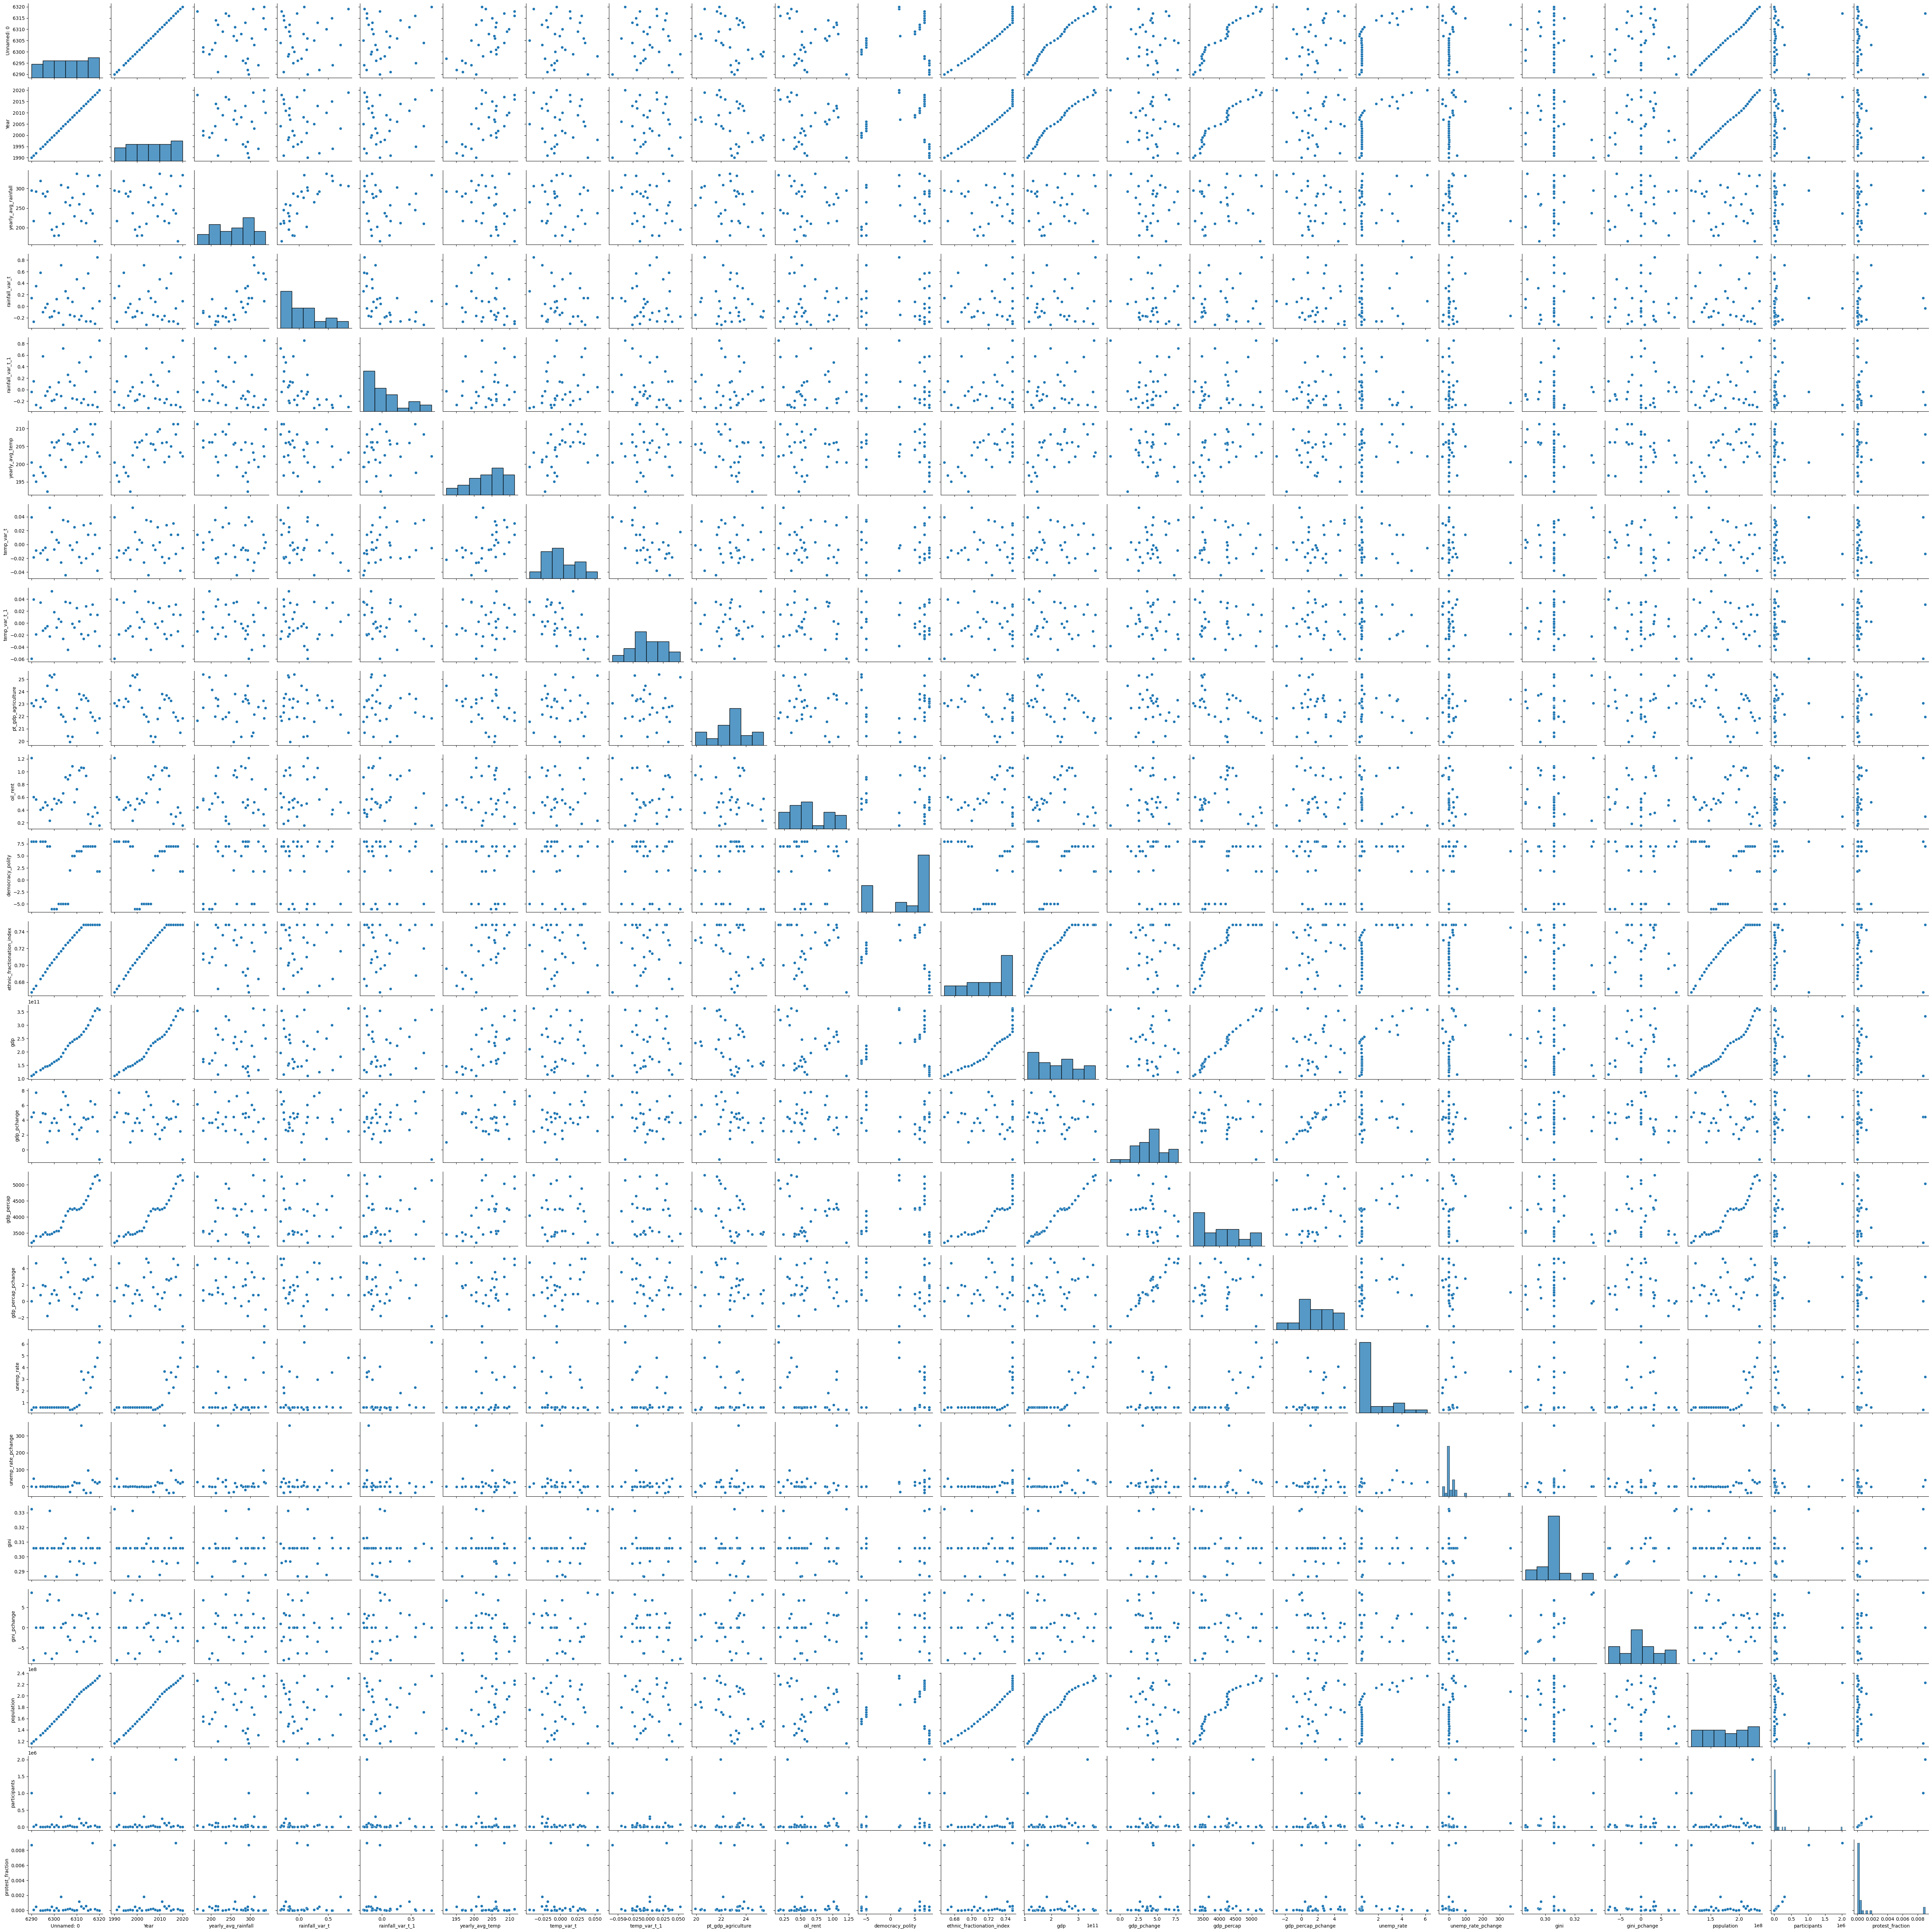

In [271]:
sns.pairplot(df)

#### Data split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[(df['Year'] >= year_begin) & (df['Year'] < year_end), features]
y = df.loc[(df['Year'] >= year_begin) & (df['Year'] < year_end), target]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, random_state = 440, test_size = .2)


In [286]:
X_train.size, X_test.size, y_train.size, y_test.size

(230, 60, 23, 6)

In [287]:
print(X_train.isnull().sum())

Year                   0
yearly_avg_rainfall    0
rainfall_var_t         0
rainfall_var_t_1       0
yearly_avg_temp        0
temp_var_t             0
pt_gdp_agriculture     0
gdp                    0
gini                   0
population             0
dtype: int64


In [288]:
print(y_train.isnull().sum())

0


#### KNN regression


In [ ]:
## import knnr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

## make model objects
knr_2 = KNeighborsRegressor(2)
knr_3 = KNeighborsRegressor(3)

## Fit the models
knr_2 = knr_2.fit(X_scaled_train, y_train)
knr_3 = knr_3.fit(X_scaled_train, y_train)

# Predict
y_pred_knr_2 = knr_2.predict(X_scaled_test)
y_pred_knr_3 = knr_3.predict(X_scaled_test)

#### RMSEs

In [290]:
from sklearn.metrics import mean_squared_error

print("KNN2 RMSE:", mean_squared_error(y_test, knr_2.predict(X_scaled_test), squared=False))
print("KNN3 RMSE:", mean_squared_error(y_test, knr_3.predict(X_scaled_test), squared=False))

KNN2 RMSE: 843109.3648785034
KNN3 RMSE: 830610.1090129137


#### R2 Score

In [303]:
from sklearn.metrics import r2_score
r2_knn2 = r2_score(y_test, y_pred_knr_2)
r2_knn3 = r2_score(y_test, y_pred_knr_3)
print("KNN2 R²:", r2_knn2)
print("KNN3 R²:", r2_knn3)

KNN2 R²: -0.31722915432722365
KNN3 R²: -0.2784623202520329


#### Predicted vs Actual (KNN fit with n_neighbors=2)

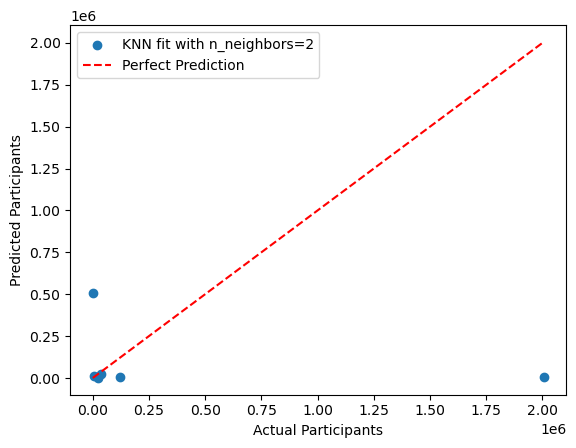

In [304]:
# Scatter plot: Predicted vs Actual
plt.scatter(y_test, y_pred_knr_2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Participants')
plt.ylabel('Predicted Participants')
plt.legend(['KNN fit with n_neighbors=2','Perfect Prediction'])
#plt.title('KNN with k=2')
#plt.xlim(left=0, right=100000)  # Change 0 to any minimum value you'd prefer
#plt.ylim(bottom=0, top=100000)  # Change 0 to any minimum value you'd prefer
plt.show()

#### Predicted vs Actual (KNN fit with n_neighbors=3)

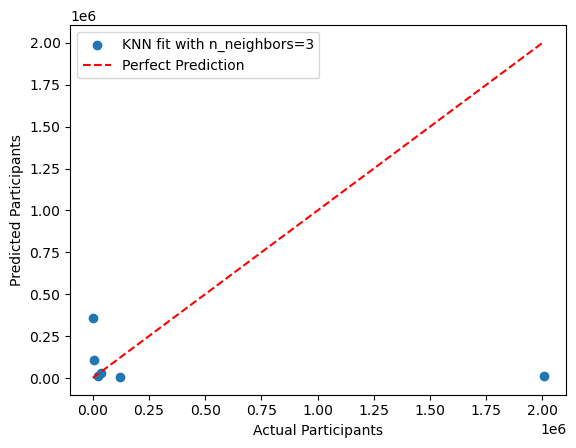

In [300]:
# Scatter plot: Predicted vs Actual
plt.scatter(y_test, y_pred_knr_3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Participants')
plt.ylabel('Predicted Participants')
plt.legend(['KNN fit with n_neighbors=3','Perfect Prediction'])
#plt.title('KNN with k=2')
#plt.xlim(left=0, right=100000)  # Change 0 to any minimum value you'd prefer
#plt.ylim(bottom=0, top=100000)  # Change 0 to any minimum value you'd prefer
plt.show()